Churn Modelling: https://www.kaggle.com/shrutimechlearn/churn-modelling

## Import the relelvant packages

`numpy` provides support for arrays and matrices and `pandas` which we've seen before and provides functionality that facilities better visualisation of 2-D arrays in a tabular format. 

Scikit-Learn otherwise known as `sklearn` is used for machine learning and has functionality for many types of classification models including decision trees.

`Matplotlib` is a plotting library that is commonly used to plot the output of machine learning models.

In [3]:
import graphviz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay,
                             plot_roc_curve, PrecisionRecallDisplay, roc_auc_score, roc_curve)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# import random undersampling
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

pd.set_option('display.max_colwidth', None)

## Get the file from Github

In [4]:
!wget https://raw.githubusercontent.com/DLPY/Classification_Session_1/main/Churn_Modelling.csv

--2022-02-04 12:38:55--  https://raw.githubusercontent.com/DLPY/Classification_Session_1/main/Churn_Modelling.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684858 (669K) [text/plain]
Saving to: ‘Churn_Modelling.csv.1’

Churn_Modelling.csv 100%[===================>] 668.81K  --.-KB/s    in 0.05s   

2022-02-04 12:38:55 (12.5 MB/s) - ‘Churn_Modelling.csv.1’ saved [684858/684858]



In [5]:
# Load the data
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Churn Modeling Data Description
This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed their account) or they continue to be a customer.

Here we have 13 feature columns and Exited is a target column.

**Row Numbers:** Row Numbers from 1 to 10000.

**CustomerId:** Unique Ids for bank customer identification.

**Surname:** Customer's last name.

**CreditScore:** Credit score of the customer.

**Geography:** The country from which the customer belongs(Germany/France/Spain).

**Gender:** Male or Female.

**Age:** Age of the customer.

**Tenure:** Number of years for which the customer has been with the bank.

**Balance:** Bank balance of the customer.

**NumOfProducts:** Number of bank products the customer is utilising.

**HasCrCard:** Binary Flag for whether the customer holds a credit card with the bank or not(0=No, 1=Yes).

**IsActiveMember:** Binary Flag for whether the customer is an active member with the bank or not(0=No, 1=Yes).

**EstimatedSalary:** Estimated salary of the customer in Euro.

**Exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained(0=No, 1=Yes).

## Transformation

### Encoding the categorical variables - Change the text into numbers

Convert the categorical values into numeric categorical labels so that this data can be used for modelling.

In [6]:
df['CountryCode'] = df['Geography'].astype('category').cat.codes
df['GenderCode'] = df['Gender'].astype('category').cat.codes

In [7]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CountryCode,GenderCode
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0


##### From the above, notice that:
 * The Geography and Gender have been converted to numeric values.
 * There are two new columns with these values: CountryCode and GenderCode.

##### From the above, notice that:
 * The Geography and Gender have been converted to numeric values.
 * There are two new columns with these values: CountryCode and GenderCode.

# Choosing predictor variables and target variable for performing Classification
**Target and Source variables**

* **Target Variable:** Exited
* **Predictor Variables:** CreditScore, CountryCode, GenderCode, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary

# Isolate Target and Predictor Variables to Different Dataframes

In [8]:
X = df[['CreditScore', 'CountryCode', 'GenderCode', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
            'IsActiveMember', 'EstimatedSalary']]
y = df[['Exited']]

# Save this list of column values for later
columns_list = list(X.columns.values)

In [9]:
X.head(5)

,CreditScore,CountryCode,GenderCode,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [10]:
y.head(5)

,Exited
0,1
1,0
2,1
3,0
4,0


# Split dataset into the training and test using train_set_split: 


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print('Training Data:', X_train.shape, y_train.shape)
print('Testing Data:', X_test.shape, y_test.shape)

Training Data: (7000, 10) (7000, 1)
Testing Data: (3000, 10) (3000, 1)


# Train, Test and Predict using a Decision Tree model

In [12]:
# Create an object using DecisionTreeClassifier, setting a few parameters such as max depth.
dtclf_model1 = DecisionTreeClassifier(random_state=42, max_features=7)

In [13]:
# Fit the classification model to the training set data.
dtclf_model1.fit(X_train, y_train)

DecisionTreeClassifier(max_features=7, random_state=42)

### Predicting the results

Training set prediction score

In [14]:
y_pred = dtclf_model1.predict(X_train)
accuracy_score(y_train, y_pred)

1.0

Test set prediction score

In [15]:
y_pred1 = dtclf_model1.predict(X_test)
accuracy_score(y_test, y_pred1)

0.789

But accuracy can be misleading...

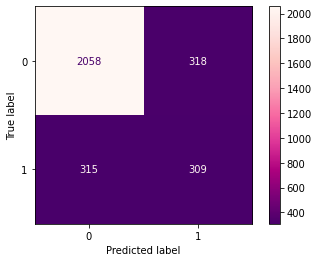

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1, cmap='RdPu_r')
plt.grid(False)

In [17]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2376
           1       0.49      0.50      0.49       624

    accuracy                           0.79      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.79      0.79      0.79      3000



With classification_report we calculate precision and recall with actual and predicted values.

For class 1 (churned users) model achieves 0.62 precision and 0.45 recall.

Precision tells us how many churned users our classifier model predicted correctly.

On the other side, recall tell us how many churned customers it missed.

In simple terms, the classifier is not very accurate for identifying churned customers - most likely due to class imbalance!

# Plotting the Decision Tree

In [18]:
target = list(df['Exited'].unique())
feature_names = list(X.columns.values)

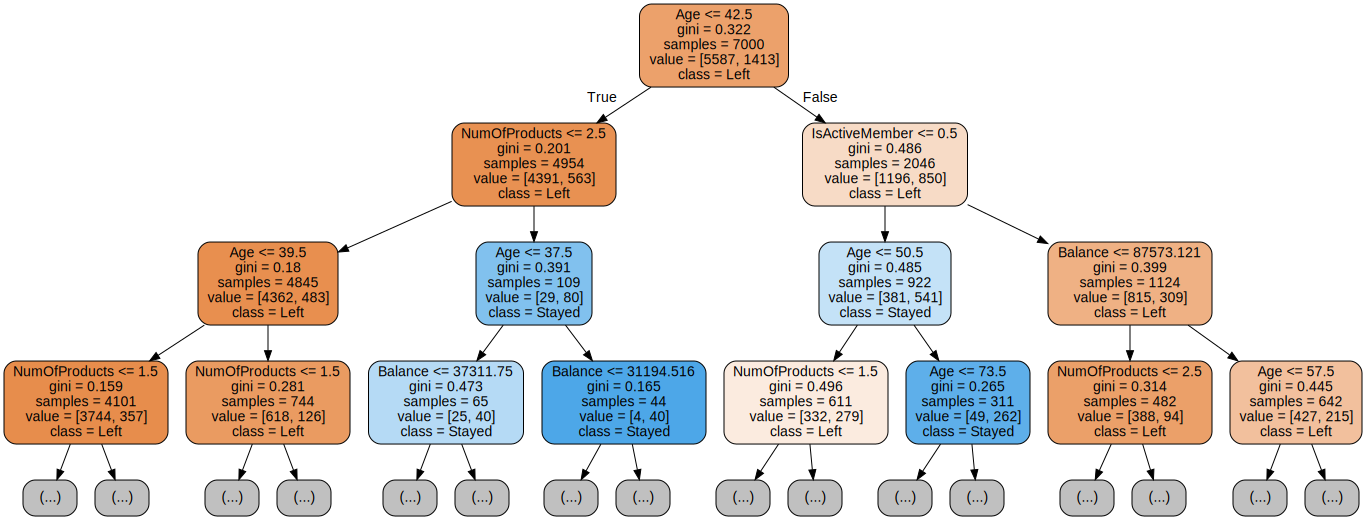

In [19]:
# Graphviz Example:

dot_data = tree.export_graphviz(dtclf_model1, feature_names=feature_names, class_names=['Left', 'Stayed'], max_depth=3,
                                filled=True, rounded=True) 
graph = graphviz.Source(dot_data)  

graph
# This can be saved as a file:
# graph.save('decision_tree_chart.jpg')

## Pruning the Decision Tree

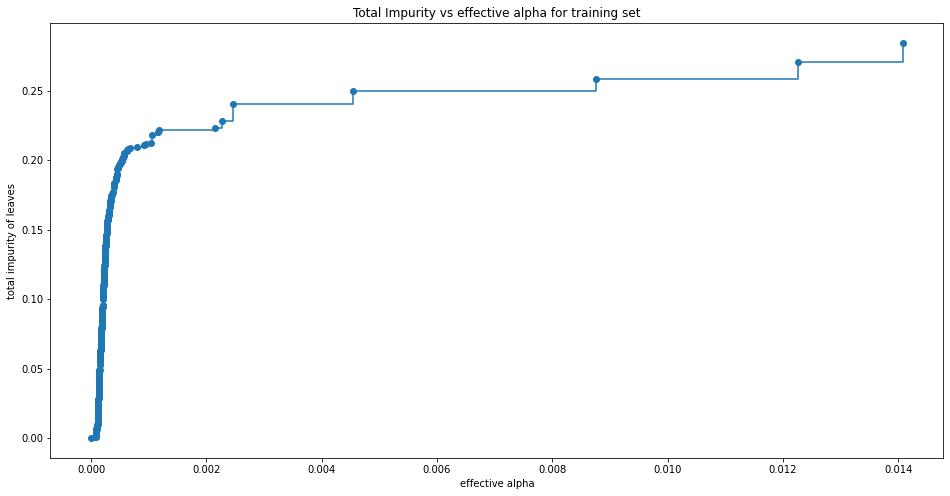

In [20]:
path = dtclf_model1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots(figsize=(16,8));
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post");
ax.set_xlabel("effective alpha");
ax.set_ylabel("total impurity of leaves");
ax.set_title("Total Impurity vs effective alpha for training set");

In [21]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.037681814376401224


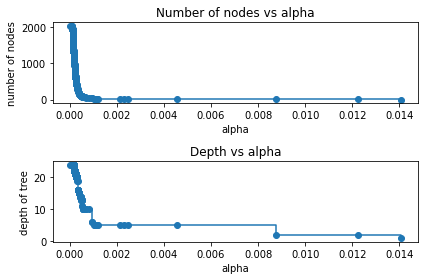

In [22]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

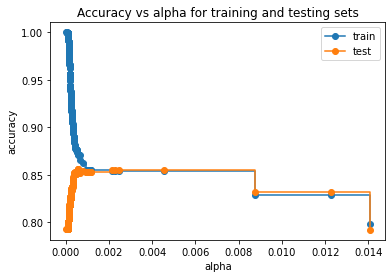

In [23]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## Re-running with alpha

In [24]:
# Create an object using DecisionTreeClassifier, setting a few parameters such as max depth.
dtclf_model2 = DecisionTreeClassifier(random_state=42, max_features=7, ccp_alpha=0.001)

# Fit the classification model to the training set data.
dtclf_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_features=7, random_state=42)

### Predicting the results

Training set prediction score

In [25]:
y_pred2 = dtclf_model2.predict(X_train)
accuracy_score(y_train, y_pred2)

0.8557142857142858

Test set prediction score

In [26]:
y_pred2 = dtclf_model2.predict(X_test)
accuracy_score(y_test, y_pred2)

0.8533333333333334

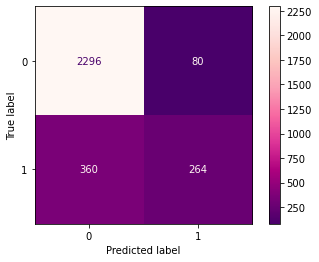

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, cmap='RdPu_r')
plt.grid(False)

In [28]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2376
           1       0.77      0.42      0.55       624

    accuracy                           0.85      3000
   macro avg       0.82      0.69      0.73      3000
weighted avg       0.84      0.85      0.84      3000



With classification_report we calculate precision and recall with actual and predicted values.

For class 1 (churned users) model achieves 0.77 precision and 0.42 recall. Precision has increased from the first model but recall decreased.

Class imbalance remains an issue!

# Plotting the Decision Tree

In [29]:
target = list(df['Exited'].unique())
feature_names = list(X.columns.values)

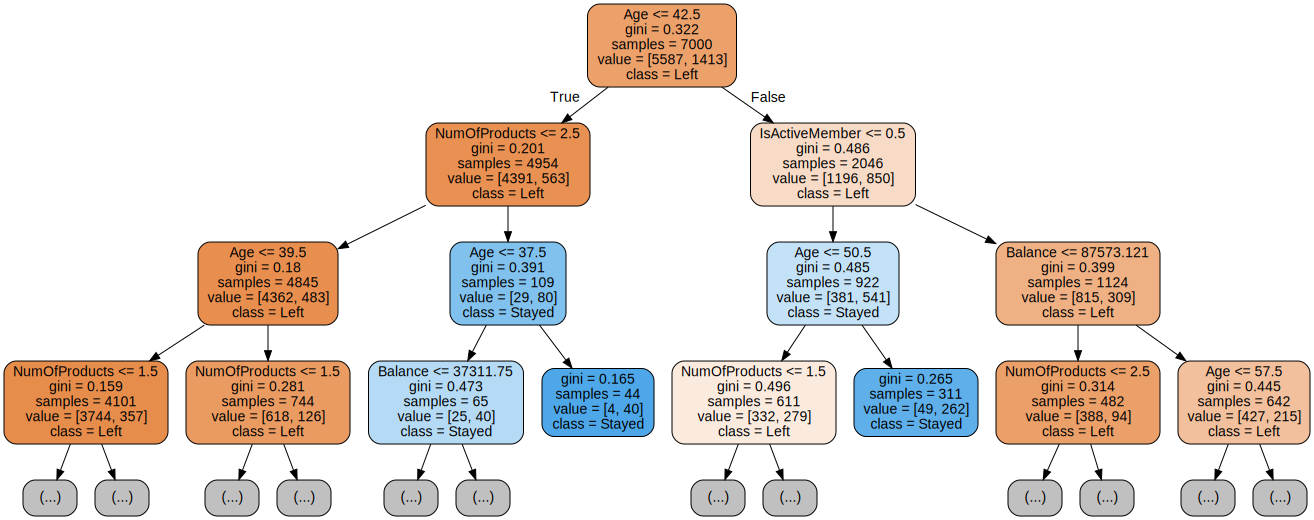

In [30]:
# Graphviz Example:

dot_data = tree.export_graphviz(dtclf_model2, feature_names=feature_names, class_names=['Left', 'Stayed'], max_depth=3,
                                filled=True, rounded=True) 
graph = graphviz.Source(dot_data)  

graph
# This can be saved as a file:
# graph.save('decision_tree_chart.jpg')

## Resampling the dataset

In [31]:
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

#PART 2

# Create an object using DecisionTreeClassifier, setting a few parameters such as max depth.
dtclf_model3 = DecisionTreeClassifier(random_state=42, max_features=7, ccp_alpha=0.0007)
dtclf_model3.fit(X_train_under, y_train_under)
y_pred3 = dtclf_model3.predict(X_test)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, y_pred3))

ROC AUC score for undersampled data:  0.7488992488992489


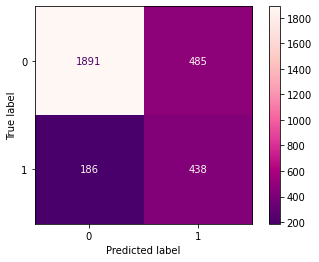

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred3, cmap='RdPu_r')
plt.grid(False)

In [33]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      2376
           1       0.47      0.70      0.57       624

    accuracy                           0.78      3000
   macro avg       0.69      0.75      0.71      3000
weighted avg       0.82      0.78      0.79      3000



## Compare all the models

In [34]:
print('----Model1----')
print(classification_report(y_test, y_pred1))
print('----Model2----')
print(classification_report(y_test, y_pred2))
print('----Model3----')
print(classification_report(y_test, y_pred3))

----Model1----
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2376
           1       0.49      0.50      0.49       624

    accuracy                           0.79      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.79      0.79      0.79      3000

----Model2----
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2376
           1       0.77      0.42      0.55       624

    accuracy                           0.85      3000
   macro avg       0.82      0.69      0.73      3000
weighted avg       0.84      0.85      0.84      3000

----Model3----
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      2376
           1       0.47      0.70      0.57       624

    accuracy                           0.78      3000
   macro avg       0.69      0.75      0.71      3000
weighted avg       0.82      

We can see that resampling increased the recall of the exited class but decreased the precision. This is a trade off we would expect. The balance between precision and recall is fundamentally a business decision. 

Are we happy to be contacting false positives (i.e. people who weren't otherwise going to churn) or would this lead to increased churn from annoyed customers. Conversely, are we happy accepting a lower level of recall meaning that many false negatives (ie. people classed as non-exit who exit) do not get contacted. 

## Compare Model2 and Model3

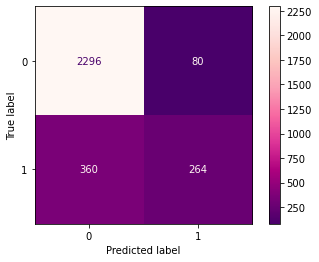

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, cmap='RdPu_r')
plt.grid(False)

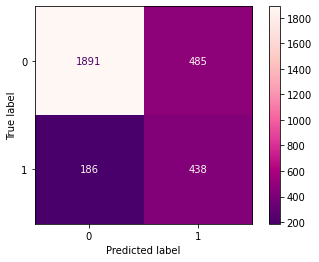

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred3, cmap='RdPu_r')
plt.grid(False)

The comparison between the confusion matrices here hopefully drives home the point around the sacrifice between recall and precision. By just examining the bottom left and top right boxes, you can see a ~50% recuction in false negatives but also a >5x increase in false positives. 